In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_albis_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Bisabolol
0,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
1,3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.000000
2,4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
3,6,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
4,9,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42969,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.105263
74996,42971,0.0,0.00000,0.0,0.0,0.0,0.322452,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.105263
74997,42971,0.0,0.00000,0.0,0.0,0.0,0.322452,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.105263
74998,42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.105263


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Alpha-Bisabolol', 'index'], axis = 1)
y = df_knn[['X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.10526316],
       [0.10526316],
       [0.10526316]])

<AxesSubplot:ylabel='Count'>

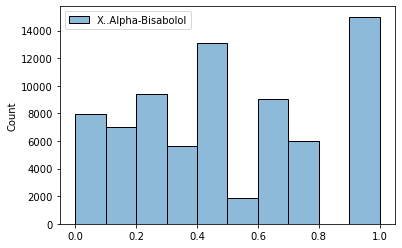

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.05304853242079559

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9051671137030007

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.8410398360466609

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([4.27468670e-04, 5.42984092e-04, 9.87407356e-04, 2.88177634e-03,
       1.86906910e-03, 1.82116520e-03, 2.29028818e-03, 2.71982359e-03,
       3.19576757e-04, 2.96412309e-04, 3.12663808e-04, 8.09165885e-03,
       2.30193439e-04, 3.68604049e-04, 4.99844752e-04, 1.05049664e-03,
       6.03923015e-04, 8.43978605e-04, 7.39866203e-04, 5.19850031e-04,
       1.59517137e-03, 3.15888961e-03, 1.28851168e-03, 2.57110723e-04,
       5.21764204e-04, 2.70710097e-04, 1.67492257e-03, 7.20491863e-04,
       4.98379346e-04, 4.19117874e-04, 5.46752308e-03, 1.29866149e-03,
       2.45519247e-03, 4.35803043e-04, 2.76257158e-03, 2.37666919e-03,
       9.35538663e-03, 4.98947709e-03, 3.86426930e-05, 6.96898689e-04,
       2.58889511e-04, 2.93096872e-03, 6.73929343e-04, 4.88557786e-03,
       5.30763549e-04, 2.72808127e-03, 1.77488561e-03, 8.19773951e-04,
       1.13277320e-03, 1.22062822e-04, 4.81825609e-04, 3.11232091e-04,
       1.15447494e-03, 9.54410292e-05, 1.23761102e-03, 3.59492519e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_3,tfidf_6,tfidf_7,tfidf_11,tfidf_21,tfidf_30,tfidf_32,tfidf_34,tfidf_35,tfidf_36,...,citrus,diesel,earthy,grape,lemon,mint,orange,pungent,sweet,woody
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.15591,0.213037,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,0.165804,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.184581,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.000000,0.352157,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.000000,0.349629,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.000000,0.349629,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_3',
 'tfidf_6',
 'tfidf_7',
 'tfidf_11',
 'tfidf_21',
 'tfidf_30',
 'tfidf_32',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_41',
 'tfidf_43',
 'tfidf_45',
 'tfidf_67',
 'tfidf_73',
 'tfidf_78',
 'tfidf_80',
 'tfidf_81',
 'tfidf_88',
 'tfidf_90',
 'tfidf_93',
 'tfidf_98',
 'tfidf_101',
 'tfidf_103',
 'tfidf_104',
 'tfidf_106',
 'tfidf_119',
 'tfidf_121',
 'tfidf_124',
 'tfidf_126',
 'tfidf_128',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_168',
 'tfidf_173',
 'tfidf_178',
 'tfidf_181',
 'tfidf_190',
 'tfidf_198',
 'tfidf_199',
 'tfidf_201',
 'tfidf_207',
 'tfidf_210',
 'tfidf_215',
 'tfidf_217',
 'tfidf_230',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_248',
 'tfidf_253',
 'tfidf_258',
 'tfidf_264',
 'tfidf_270',
 'tfidf_272',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_289',
 'tfidf_302',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_319',
 'tfidf_320',
 'tfidf_329',
 'tfidf_336',
 'tfidf_337',
 'tf

In [52]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_albis.pkl")
joblib.dump(selector, "selector_knn_tfidf_albis.pkl")

['selector_knn_tfidf_albis.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.04592610066833752

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.012240321550719252

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.11063598668931937

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9265954678840749

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8823023114265413

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.027704104564829087

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.008641042991660797

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.09295721054152171

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9869822243539974

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9169114322064031

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [53]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_albis.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_albis.pkl")

['y_test_knreg_tfidf_albis.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.028576330238989322

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9131709336415184

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.009172532685938562

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.09577334016279562

In [47]:
y_test

,X..Alpha-Bisabolol
11591,0.368421
52020,0.473684
34666,1.000000
22169,0.421053
23049,0.340351
...,...
60863,1.000000
32316,0.052632
60933,0.217105
43206,0.168421


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

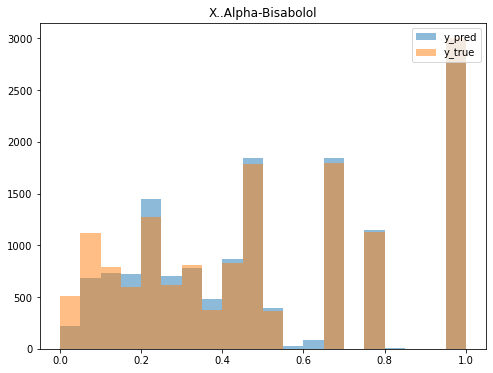

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Bisabolol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_albis.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.957
P-value: 0.000


<AxesSubplot:>

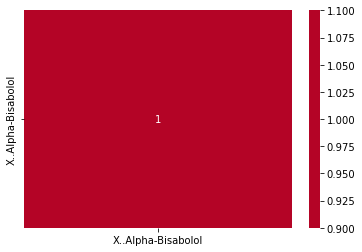

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)